# **WEB SCRAPING**

> ***Theme: Tourism In India***


Author: [@anushka](https://github.com/AnuAgni)

---



### ***Scraping Static Websites***
In this segment we shall be scraping the [Tourism In India](https://en.wikipedia.org/wiki/Tourism_in_India) Wikipedia Website to get all the useful information in one place, leaving out the irrelevant data.

In [ ]:
#Importing the library we use to open urls
import urllib.request

#Specifying the url of the page we are scraping
url = "https://en.wikipedia.org/wiki/Tourism_in_India"

#Opening the url using urllib.request and putting the HTML into the page variable
page = urllib.request.urlopen(url)

In [ ]:
#Importing the BeautifulSoup library so we can parse HTML and XML documents
from bs4 import BeautifulSoup

#Parsing the HTML from our url into the BeautifulSoup library parse tree format
soup = BeautifulSoup(page, "lxml")

In [ ]:
#Viewing the underlying HTML source command of the chosen webpage  
print(soup.prettify())

<!DOCTYPE html>
<html class="client-nojs" dir="ltr" lang="en">
 <head>
  <meta charset="utf-8"/>
  <title>
   Tourism in India - Wikipedia
  </title>
  <script>
   document.documentElement.className="client-js";RLCONF={"wgBreakFrames":false,"wgSeparatorTransformTable":["",""],"wgDigitTransformTable":["",""],"wgDefaultDateFormat":"dmy","wgMonthNames":["","January","February","March","April","May","June","July","August","September","October","November","December"],"wgRequestId":"b594b091-6f61-4780-bec2-7f10de65c59b","wgCSPNonce":false,"wgCanonicalNamespace":"","wgCanonicalSpecialPageName":false,"wgNamespaceNumber":0,"wgPageName":"Tourism_in_India","wgTitle":"Tourism in India","wgCurRevisionId":1075734552,"wgRevisionId":1075734552,"wgArticleId":283772,"wgIsArticle":true,"wgIsRedirect":false,"wgAction":"view","wgUserName":null,"wgUserGroups":["*"],"wgCategories":["Articles with short description","Short description is different from Wikidata","Wikipedia pending changes protected pages","Wi

In [ ]:
#Trying out few HTML tags and bringing back the page 'title' and the data between start and end 'title' tags
soup.title

<title>Tourism in India - Wikipedia</title>

In [ ]:
#Refining the extracted data further by specifying the 'string' element and bringing out the content without the 'title' tags
soup.title.string

'Tourism in India - Wikipedia'

In [ ]:
#Using the find_all function to bring back all instances of the 'table' tag in the HTML and store in 'all_tables' variable
all_tables = soup.find_all("table")
all_tables

[<table class="box-Update plainlinks metadata ambox ambox-content ambox-Update" role="presentation"><tbody><tr><td class="mbox-image"><div style="width:52px"><img alt="Ambox current red Asia Australia.svg" data-file-height="290" data-file-width="360" decoding="async" height="34" src="//upload.wikimedia.org/wikipedia/commons/thumb/b/bd/Ambox_current_red_Asia_Australia.svg/42px-Ambox_current_red_Asia_Australia.svg.png" srcset="//upload.wikimedia.org/wikipedia/commons/thumb/b/bd/Ambox_current_red_Asia_Australia.svg/63px-Ambox_current_red_Asia_Australia.svg.png 1.5x, //upload.wikimedia.org/wikipedia/commons/thumb/b/bd/Ambox_current_red_Asia_Australia.svg/84px-Ambox_current_red_Asia_Australia.svg.png 2x" width="42"/></div></td><td class="mbox-text"><div class="mbox-text-span">This article needs to be <b>updated</b>. The reason given is: Update on <a href="/wiki/COVID-19" title="COVID-19">COVID-19</a> and tourism industry.<span class="hide-when-compact"> Please help update this article to re

In [ ]:
#Specifically extracting our chosen table from the list of tables and storing it inside 'right_table' variable usig the find_all function and the class name
right_table = soup.find_all('table', class_="wikitable")

We now begin extracting the tables individually.

Following are the data tables that we shall be extracting from our desired website [details and variable name used]:

*   df1: Foreign tourist arrivals in India (1997–2020)
*   df2: Foreign exchange earnings from tourism in India (1997–2020)
*   df3: Source countries for foreign tourist arrivals in India in 2019
*   df4: Share of top 10 states/UTs of India in number of foreign tourist visits in 2017
*   df5: Share of top 10 states/UTs of India in number of domestic tourist visits in 2017 

In [ ]:
#FOR THE FIRST TABLE 

#Declaring three lists so that the data of three columns are stored in the lists individually
A = []
B = []
C = []

#Adding data to the respective lists of our selection
for row in right_table[0].findAll('tr'):
  cells = row.findAll('td')
  if len(cells) == 3:
    A.append(cells[0].find(text=True))
    B.append(cells[1].find(text=True))
    C.append(cells[2].find(text=True))

In [ ]:
#Introducing the pandas library to setup data frame for our selected data
import pandas as pd
df1 = pd.DataFrame(A,columns=['Year'])
df1['Arrivals (millions)']=B
df1['% change']=C
df1 = df1.replace({"\n": ""}, regex=True)
blankIndex=[''] * len(df1)
df1.index=blankIndex

In [ ]:
#FOR THE SECOND TABLE

#Declaring five lists so that the data of five columns are stored in the lists individually
D = []
E = []
F = []
G = []
H = []

#Adding data to the respective lists of our selection
for row in right_table[1].findAll('tr'):
  cells = row.findAll('td')
  if len(cells) == 5:
    D.append(cells[0].find(text=True))
    E.append(cells[1].find(text=True))
    F.append(cells[2].find(text=True))
    G.append(cells[3].find(text=True))
    H.append(cells[4].find(text=True))

In [ ]:
#Introducing the pandas library to setup data frame for our selected data
import pandas as pd
df2 = pd.DataFrame(D,columns=['Year'])
df2['Earnings (US$ million)']=E
df2['% change']=F
df2['Earnings (₹ crores)']=G
df2['% change']=H
df2 = df2.replace({"\n": ""}, regex=True)
blankIndex=[''] * len(df2)
df2.index=blankIndex

In [ ]:
#FOR THE THIRD TABLE

#Declaring four lists so that the data of four columns are stored in the lists individually
I = []
J = []
K = []
L = []

#Adding data to the respective lists of our selection
for row in right_table[2].findAll('tr'):
  cells = row.findAll('td')
  if len(cells) == 4:
    I.append(cells[0].find(text=True))
    clnk = cells[1].findAll('a')
    J.append(clnk[0].contents[0])
    K.append(cells[2].find(text=True))
    L.append(cells[3].find(text=True))

In [ ]:
#Introducing the pandas library to setup data frame for our selected data
import pandas as pd
df3 = pd.DataFrame(I,columns=['Rank'])
df3['Country']=J
df3['Number']=K
df3['Share in %']=L
df3 = df3.replace({"\n": ""}, regex=True)
blankIndex=[''] * len(df3)
df3.index=blankIndex

In [ ]:
#FOR THE FOURTH TABLE

#Declaring four lists so that the data of four columns are stored in the lists individually
M = []
N = []
O = []
P = []

#Adding data to the respective lists of our selection
for row in right_table[3].findAll('tr'):
  cells = row.findAll('td')
  if len(cells) == 4:
    M.append(cells[0].find(text=True))
    N.append(cells[1].find(text=True))
    O.append(cells[2].find(text=True))
    P.append(cells[3].find(text=True))

In [ ]:
#Introducing the pandas library to setup data frame for our selected data
import pandas as pd
df4 = pd.DataFrame(M,columns=['Rank'])
df4['State/Union Territory']=N
df4['Number']=O
df4['Share in %']=P
df4 = df4.replace({"\n": ""}, regex=True)
blankIndex=[''] * len(df4)
df4.index=blankIndex

In [ ]:
#FOR THE FIFTH TABLE

#Declaring four lists so that the data of four columns are stored in the lists individually
Q = []
R = []
S = []
T = []

#Adding data to the respective lists of our selection
for row in right_table[4].findAll('tr'):
  cells = row.findAll('td')
  if len(cells) == 4:
    Q.append(cells[0].find(text=True))
    R.append(cells[1].find(text=True))
    S.append(cells[2].find(text=True))
    T.append(cells[3].find(text=True))

In [ ]:
#Introducing the pandas library to setup data frame for our selected data
import pandas as pd
df5 = pd.DataFrame(M,columns=['Rank'])
df5['State/Union Territory']=N
df5['Number']=O
df5['Share in %']=P
df5 = df5.replace({"\n": ""}, regex=True)
blankIndex=[''] * len(df5)
df5.index=blankIndex

In [ ]:
#Displaying all the tables obtained
print('Foreign tourist arrivals in India\n(1997–2020)')
df1

Foreign tourist arrivals in India
(1997–2020)


,Year,Arrivals (millions),% change
,1997,2.37,3.8
,1998,2.36,−0.7
,1999,2.48,5.2
,2000,2.65,6.7
,2001,2.54,−4.2
,2002,2.38,−6.0
,2003,2.73,14.3
,2004,3.46,26.8
,2005,3.92,13.3
,2006,4.45,13.5


In [ ]:
print('Foreign exchange earnings from tourism in India\n(1997–2020)')
df2

Foreign exchange earnings from tourism in India
(1997–2020)


,Year,Earnings (US$ million),% change,Earnings (₹ crores)
,1997,"2,889",4.6,"10,511"
,1998,"2,948",15.6,"12,150"
,1999,"3,009",6.6,"12,951"
,2000,"3,460",20.7,"15,626"
,2001,"3,198",−3.5,"15,083"
,2002,"3,103",−0.1,"15,064"
,2003,"4,463",37.6,"20,729"
,2004,"6,170",34.8,"27,944"
,2005,"7,493",18.5,"33,123"
,2006,"8,634",17.8,"39,025"


In [ ]:
print('Source countries for foreign tourist arrivals in India in 2019')
df3

Source countries for foreign tourist arrivals in India in 2019


,Rank,Country,Number,Share in %
,1,Bangladesh,"2,577,727",23.58
,2,United States,"1,512,032",13.83
,3,United Kingdom,"1,000,292",9.15
,4,Australia,"367,241",3.36
,5,Canada,"351,859",3.22
,6,[],"339,442",3.11
,7,Malaysia,"334,579",3.06
,8,Sri Lanka,"330,861",3.03
,9,Germany,"264,973",2.42
,10,Russia,"251,319",2.3


In [ ]:
print('Share of top 10 states/UTs of India in number of foreign tourist visits in 2017')
df4

Share of top 10 states/UTs of India in number of foreign tourist visits in 2017


,Rank,State/Union Territory,Number,Share in %
,1,Maharashtra,"5,078,514",18.9
,2,Tamil Nadu,"4,860,455",18.1
,3,Uttar Pradesh,"3,104,062",13.3
,4,Delhi,"2,379,169",10.2
,5,Rajasthan,"1,489,500",6.4
,6,West Bengal,"1,475,311",6.3
,7,Kerala,"977,479",4.2
,8,Bihar,"923,737",4.0
,9,Karnataka,"636,502",2.7
,10,Goa,"541,480",2.3


In [ ]:
print('Share of top 10 states/UTs of India in number of domestic tourist visits in 2017')
df5

Share of top 10 states/UTs of India in number of domestic tourist visits in 2017


,Rank,State/Union Territory,Number,Share in %
,1,Maharashtra,"5,078,514",18.9
,2,Tamil Nadu,"4,860,455",18.1
,3,Uttar Pradesh,"3,104,062",13.3
,4,Delhi,"2,379,169",10.2
,5,Rajasthan,"1,489,500",6.4
,6,West Bengal,"1,475,311",6.3
,7,Kerala,"977,479",4.2
,8,Bihar,"923,737",4.0
,9,Karnataka,"636,502",2.7
,10,Goa,"541,480",2.3


---

### ***Data Visualization***

We obtained a load amount of data and tables from our desired website. 

Now with the help of the concepts of data visualization we shall use the data to observe and visualize some amount of the data.

---

Graph showing share of top 10 states/UT of India in number of domestic tourist visits in 2017



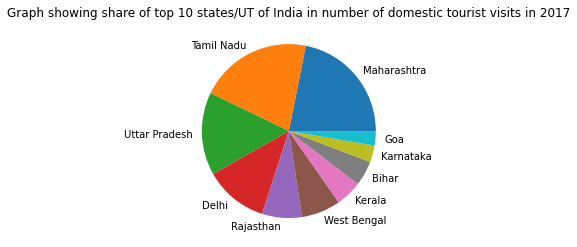

In [ ]:
#Visualizing the data obtained from the tables extracted
import matplotlib.pyplot as plt

print('Graph showing share of top 10 states/UT of India in number of domestic tourist visits in 2017\n')
plt.pie(df4['Share in %'], labels=df4['State/Union Territory'])
plt.title('Graph showing share of top 10 states/UT of India in number of domestic tourist visits in 2017')
plt.show()

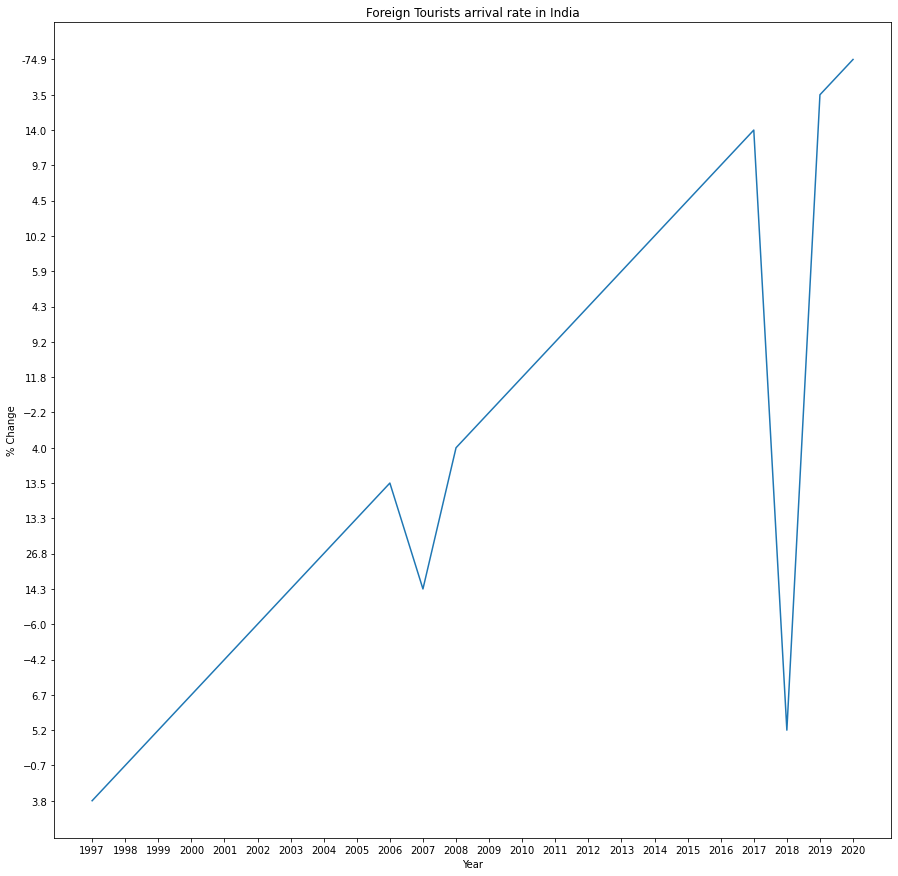

In [ ]:
plt.figure(figsize=(15,15))
plt.xlabel('Year')
plt.ylabel('% Change')
plt.title('Foreign Tourists arrival rate in India')
plt.plot(df1['Year'],df1['% change'])
plt.show()

---

### ***Scraping Data Based on User-Search***

Now we implement the wikipedia package to use in-built functions to extract relevant data as per user's input in the most efficient manner.

---

In [ ]:
#Installing the wikipedia package
!pip3 install wikipedia

  Created wheel for wikipedia: filename=wikipedia-1.4.0-py3-none-any.whl size=11695 sha256=c1af553a9ff8a0e2c807e009877b1869b60951db57e58176471f54dcfa715abf
  Stored in directory: /root/.cache/pip/wheels/15/93/6d/5b2c68b8a64c7a7a04947b4ed6d89fb557dcc6bc27d1d7f3ba
Successfully built wikipedia


In [ ]:
#Importing the wikipedia package to work efficiently for the desired results
import wikipedia as wiki

In [ ]:
#Obtain user's choice of search
user_input = input('Enter your search: ')

Enter your search: Jim Corbett National Park


In [ ]:
#Command to obtain all the search suggestions of user input
print(wiki.search(user_input))

['Jim Corbett National Park', 'Jim Corbett', 'Kotdwar', 'Ramnagar, Nainital', 'James Corbett', 'List of national parks of India', 'Kaal (2005 film)', 'Kaziranga National Park', 'Amangarh Tiger Reserve', 'Uttarakhand']


In [ ]:
#Search engine suggestion of wikipedia (a feature which allows user to type only few alphabets and obtain the rest through suggestions)
print(wiki.suggest("Jim Corbet"))

jim corbett


In [ ]:
#Obtaining the summary of an article on Wikipedia
print(wiki.summary(user_input))

Jim Corbett National Park is a national park in India located in the Nainital district of  Uttarakhand state.  The first national park in India, it was established in 1936 during the British Raj and named Hailey National Park after William Malcolm Hailey, a governor of the United Provinces in which it was then located. In 1956, nearly a decade after India's independence, it was renamed Corbett National Park after the hunter and naturalist Jim Corbett, who had played a leading role in its establishment and had died the year before.  The park was the first to come under the Project Tiger initiative.Corbett National Park comprises 520.8 km2 (201.1 sq mi) area of hills, riverine belts, marshy depressions, grasslands and a large lake. The elevation ranges from 1,300 to 4,000 ft (400 to 1,220 m). Winter nights are cold but the days are bright and sunny. It rains from July to September. The park has sub-Himalayan belt geographical and ecological characteristics. Dense moist deciduous forest m

In [ ]:
#Obtaining the summary in a different language other than english
wiki.set_lang("hi")
print(wiki.summary(user_input))

जिम कॉर्बेट राष्ट्रीय उद्यान भारत का सबसे पुराना राष्ट्रीय पार्क है और १९३६ में लुप्तप्राय बंगाल बाघ की रक्षा के लिए हैंली नेशनल पार्क के रूप में स्थापित किया गया था। यह उत्तराखण्ड के नैनीताल जिले के रामनगर नगर के पास स्थित है और इसका नाम जिम कॉर्बेट के नाम पर रखा गया था जिन्होंने इसकी स्थापना में महत्वपूर्ण भूमिका निभाई थी। बाघ परियोजना पहल के तहत आने वाला यह पहला पार्क था। यह एक गौरवशाली पशु विहार है। यह रामगंगा की पातलीदून घाटी में १३१८.५४ वर्ग किलोमीटर में बसा हुआ है जिसके अंतर्गत ८२१.९९ वर्ग किलोमीटर का जिम कॉर्बेट व्याघ्र संरक्षित क्षेत्र भी आता है।
पार्क में उप-हिमालयन बेल्ट की भौगोलिक और पारिस्थितिक विशेषताएं हैं। यह एक इकोटोरिज़्म गंतव्य भी है और यहाँ पौधों की 488 प्रजातियां और जीवों की एक विविधता है। पर्यटन की गतिविधियों में वृद्धि और अन्य समस्याएं पार्क के पारिस्थितिक संतुलन के लिए एक गंभीर चुनौती पेश कर रहीं हैं।
कॉर्बेट एक लंबे समय के लिए पर्यटकों और वन्यजीव प्रेमियों के लिए अड्डा रहा है। कोर्बेट टाइगर रिजर्व के चयनित क्षेत्रों में ही पर्यटन गतिविधि को अनुमति दी जाती है ता

In [ ]:
#Changing the language again into default language
wiki.set_lang("en")

In [ ]:
#Obtaining the title of the article
p = wiki.page(user_input)
print(p.title)

Jim Corbett National Park


In [ ]:
#Obtaining the url of the article
print(p.url)

https://en.wikipedia.org/wiki/Jim_Corbett_National_Park


In [ ]:
#Scraping the complete article
print(p.content)

Jim Corbett National Park is a national park in India located in the Nainital district of  Uttarakhand state.  The first national park in India, it was established in 1936 during the British Raj and named Hailey National Park after William Malcolm Hailey, a governor of the United Provinces in which it was then located. In 1956, nearly a decade after India's independence, it was renamed Corbett National Park after the hunter and naturalist Jim Corbett, who had played a leading role in its establishment and had died the year before.  The park was the first to come under the Project Tiger initiative.Corbett National Park comprises 520.8 km2 (201.1 sq mi) area of hills, riverine belts, marshy depressions, grasslands and a large lake. The elevation ranges from 1,300 to 4,000 ft (400 to 1,220 m). Winter nights are cold but the days are bright and sunny. It rains from July to September. The park has sub-Himalayan belt geographical and ecological characteristics. Dense moist deciduous forest m

In [ ]:
#Obtaining all the images of the article
print(p.images)

['https://upload.wikimedia.org/wikipedia/commons/1/17/..Uttarakhand_Flag%28INDIA%29.png', 'https://upload.wikimedia.org/wikipedia/commons/7/7b/A_spotted_deer_or_Chital_in_Jim_Corbett_national_park_looking_straight_to_the_camera.jpg', 'https://upload.wikimedia.org/wikipedia/commons/2/28/An_elephant_herd_at_Jim_Corbett_National_Park.jpg', 'https://upload.wikimedia.org/wikipedia/commons/c/cd/Asian_Elephant_at_Corbett_National_Park4.jpg', 'https://upload.wikimedia.org/wikipedia/commons/9/9a/Asian_Elephant_at_Corbett_National_Park_10.jpg', 'https://upload.wikimedia.org/wikipedia/commons/e/ee/Asian_Elephant_in_Corbett_National_Park.jpg', 'https://upload.wikimedia.org/wikipedia/commons/7/78/Bengal-Tiger_Corbett_Uttarakhand_Dec-2013.jpg', 'https://upload.wikimedia.org/wikipedia/commons/8/88/Elephant_Family-_Jim_Corbett_National_Park.jpg', 'https://upload.wikimedia.org/wikipedia/commons/f/f6/India_Uttarakhand_location_map.svg', 'https://upload.wikimedia.org/wikipedia/commons/d/dc/India_location

---